In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"D:\Customercurn\archive\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Checking for null values

In [3]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

So we can say there is no null values in dataset

In [4]:
# Removing Columns that will not be useful

In [5]:

df=df.drop(['customerID','gender'],axis=1)

In [6]:
e=df.dtypes
e

SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Arranging the TotalCharges Column as Object;
# Treating errors as empty values "Coerce"
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = "coerce") 
df.dropna()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


In [9]:
# Count of Yes and No for Churns:
print("NÚMERO DE CHURNS:\n", df["Churn"].value_counts(), "\n")

NÚMERO DE CHURNS:
 No     5174
Yes    1869
Name: Churn, dtype: int64 



Converting target varible in binary from

In [10]:
df['Churn']=np.where(df.Churn == 'Yes',1,0)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [11]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


# Converting all categorical variables into dummy variables


In [12]:
telco_data_dummies = pd.get_dummies(df)
telco_data_dummies=telco_data_dummies.dropna(how = "any", axis = 0)
telco_data_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0


In [13]:
telco_data_dummies.isnull().sum()

SeniorCitizen                              0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_No internet service           0
OnlineBack

# Building a CORRELATION of ALL predictors with 'Churn'

<AxesSubplot:>

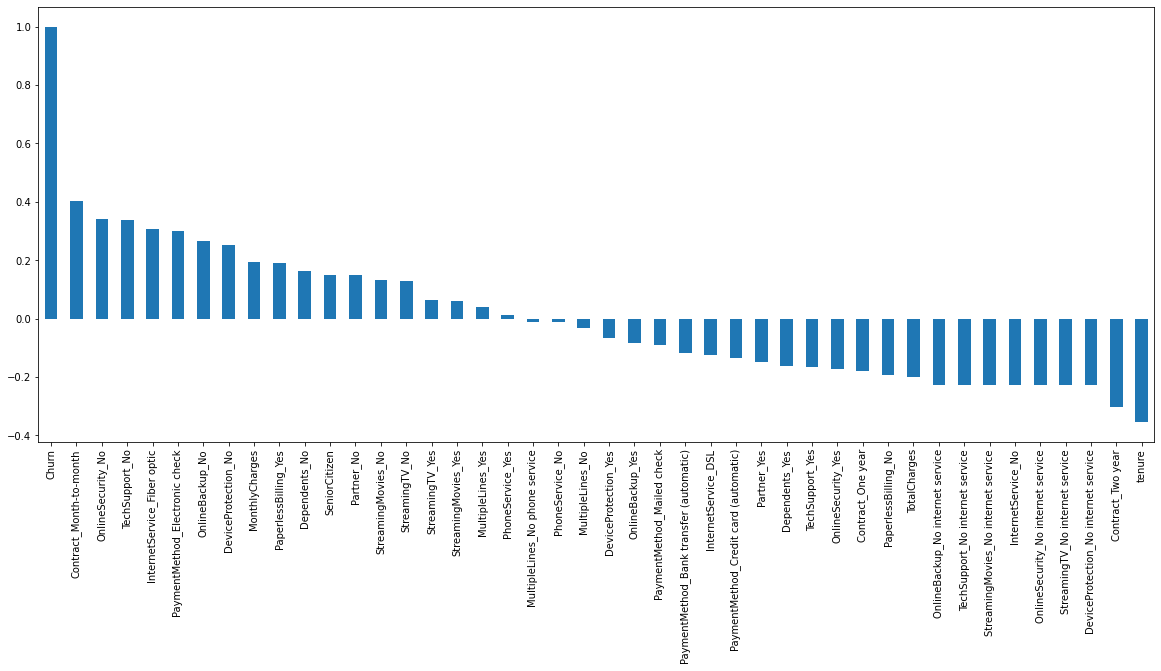

In [14]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

# Importing the necessary libraries

In [15]:

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [16]:
telco_data_dummies.value_counts("Churn")

Churn
0    5163
1    1869
dtype: int64

In [17]:
# Defining the variables that will enter the model:
x = telco_data_dummies.drop('Churn',axis = 1)
x

y = telco_data_dummies['Churn']
y

# 0-No to Churn // 1-Yes to Churn
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

# Variable Balancing

In [18]:
# Instantiating the balancing object 
smote = SMOTE(random_state=0)

# Applying SMOTE balance
x_resampled_smote, y_resampled_smote = smote.fit_resample(x, y)
y_resampled_smote.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size = 0.2)

# Diffrent machine learning model

In [20]:
#===== Decision Tree Classifier =========================

# Creating the model:
model_dt = DecisionTreeClassifier( max_depth = 6, min_samples_leaf = 8)

# Fitting the Model (Using the training data to train the model):
model_dt.fit(x_train, y_train)
  
# Predicting the data and comparing the result with the test values:
y_pred = model_dt.predict(x_test)

accuracy_dt = accuracy_score(y_test, y_pred, normalize=True)
f1_dt = f1_score(y_test, y_pred, average='binary')
roc_dt = metrics.roc_auc_score(y_test, y_pred, average='macro') 
    


In [21]:
accuracy_dt

0.7945984363894811

In [22]:
#===== KNN =========================================
  
# Creating the model and Fitting the Model:
model_knn = KNeighborsClassifier(n_neighbors=7).fit(x_train, y_train)

# Predicting the data
y_pred = model_knn.predict(x_test)

# Metrics:
accuracy_knn = accuracy_score(y_test, y_pred, normalize=True)
f1_knn = f1_score(y_test, y_pred, average='binary')
roc_knn = metrics.roc_auc_score(y_test, y_pred, average='macro')
    


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [23]:
#===== Random Forest Classifier =========================
    
# Creating the model:  
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100, max_depth=6, min_samples_leaf=8)
    
# Fitting the Model   
model_rf.fit(x_train,y_train)
    
# Predicting the data  
y_pred=model_rf.predict(x_test)

# Metrics:
accuracy_rf = accuracy_score(y_test, y_pred, normalize=True)
f1_rf = f1_score(y_test, y_pred, average='binary')
roc_rf = metrics.roc_auc_score(y_test, y_pred, average='macro')    

In [24]:
#===== Logistic Regression =========================

# Creating the model:
model_lr=LogisticRegression(random_state=100)
 
# Fitting the Model
model_lr.fit(x_train, y_train)

# Predicting the data
y_pred=model_lr.predict(x_test)

#Metrics:
accuracy_lr = accuracy_score(y_test, y_pred, normalize=True)
f1_lr = f1_score(y_test, y_pred, average='binary')
roc_lr = metrics.roc_auc_score(y_test, y_pred, average='macro')

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
#===== SVM =========================================

# Creating the model:
model_svm = svm.SVC(kernel ='rbf')

# Fitting the Model
model_svm.fit(x_train, y_train)

# Predicting the data
y_pred = model_svm.predict(x_test)

# Metrics:
accuracy_svm = accuracy_score(y_test, y_pred, normalize=True)
f1_svm = f1_score(y_test, y_pred, average='binary')
roc_svm = metrics.roc_auc_score(y_test, y_pred, average='macro')
accuracy_svm  

0.7420042643923241

In [36]:
classification_metrics_accuracy = [accuracy_dt, accuracy_rf, accuracy_lr, 
                                     accuracy_knn,accuracy_svm]

classification_metrics_f1 = [f1_dt, f1_rf, f1_lr, f1_knn ,f1_svm]

classification_metrics_roc =  [roc_dt, roc_rf, roc_lr, roc_knn ,roc_svm]
    

In [37]:
scores_df = pd.DataFrame(index=['Decision Tree', 'Random Forest', 'Logistic Regression', 'KNN','SVM'], 
columns=['Accuracy', 'F1', 'ROC_AUC'])

scores_df['Accuracy'] = classification_metrics_accuracy
scores_df['F1'] = classification_metrics_f1
scores_df['ROC_AUC'] = classification_metrics_roc

scores_df.style.highlight_max(color = 'green')

,Accuracy,F1,ROC_AUC
Decision Tree,0.794598,0.528548,0.680995
Random Forest,0.791756,0.520458,0.676384
Logistic Regression,0.785359,0.538226,0.687348
KNN,0.766169,0.466775,0.645665
SVM,0.742004,0.000000,0.500000
